In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
from dsn.util.dsn_util import get_system_from_template, get_arch_from_template
from dsn.util.dsn_util import get_savedir
from dsn.util.plot_util import plot_opt, dsn_pairplots, \
                               pairplot, lin_reg_plot
from tf_util.stat_util import approx_equal
import matplotlib.backends.backend_pdf
import os
os.chdir('../../')

In [2]:
### EPS = 1e-16

# multivariate normal initialization variance
dirstr = 'STGCircuit'

num_masks = 2
nlayers = 10
sigma_init = 3.0
freq = "med"

c_init_order = 2
lr_order = -3
start_rs = 1
num_rs = 2
random_seeds = np.arange(start_rs, num_rs+start_rs)


0 models/STGCircuit/STGCircuit_g_el_g_synA_freq_mu=5.25E-01_5.25E-01_5.25E-01_5.25E-01_5.25E-01_2.76E-01_2.76E-01_2.76E-01_2.76E-01_2.76E-01_flow=1R_2M_10L_10U_M_A_sigma=3.00_c=2_rs=1/
1 models/STGCircuit/STGCircuit_g_el_g_synA_freq_mu=5.25E-01_5.25E-01_5.25E-01_5.25E-01_5.25E-01_2.76E-01_2.76E-01_2.76E-01_2.76E-01_2.76E-01_flow=1R_2M_10L_10U_M_A_sigma=3.00_c=2_rs=2/


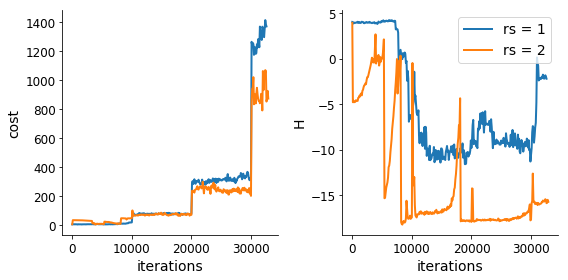

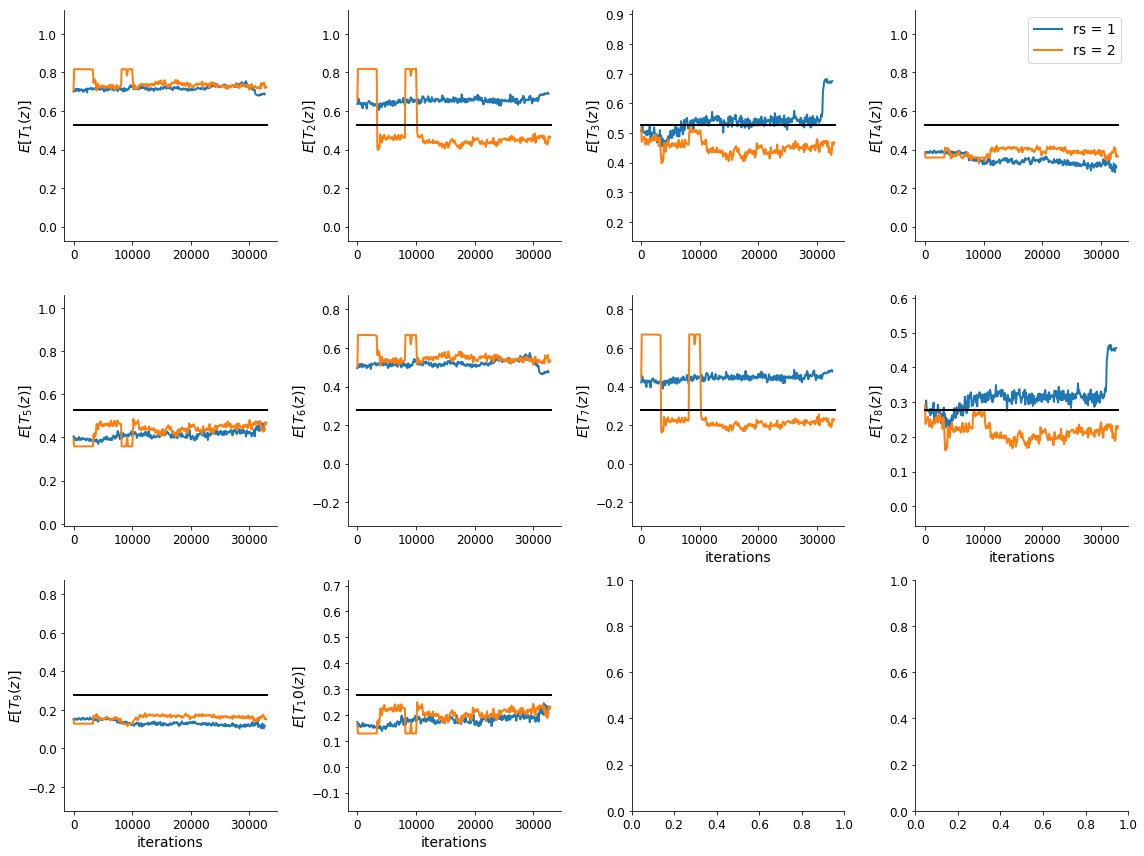

In [3]:
sysname = "STGCircuit"
param_dict = {"freq":freq}
system = get_system_from_template(sysname, param_dict)

# Get DSN architecture
arch_params = {
               'D':system.D,
               'num_masks':num_masks,
               'nlayers':nlayers,
               'mu_init':system.density_network_init_mu,
               'sigma_init':sigma_init,
              }
param_dict.update(arch_params)
arch_dict = get_arch_from_template(sysname, param_dict)


model_dirs = []
legendstrs = []
max_inds = []
for i in range(num_rs):
    random_seed = random_seeds[i]
    dsndir = get_savedir(system, arch_dict, c_init_order, random_seed, dirstr)
    model_dirs.append(dsndir)
    legendstrs.append('rs = %d' % random_seed)
    
alpha = 0.05
frac_samps = 0.8

figs, ME_its = plot_opt(model_dirs, legendstrs, con_method='mix', \
                                        alpha=alpha, frac_samps=frac_samps, maxconlim=0.6)

In [4]:
print(ME_its)

[None, None]


0
dist (200, 2)
hubfreq
1
dist (200, 2)
hubfreq


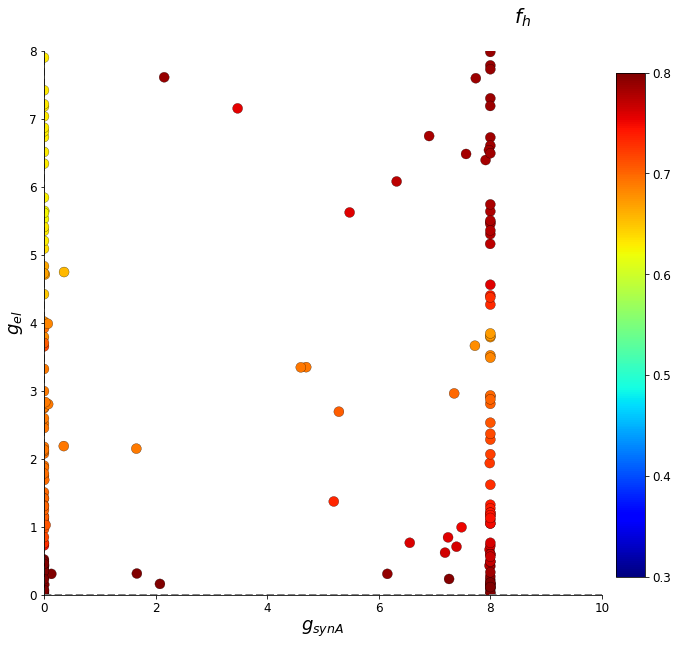

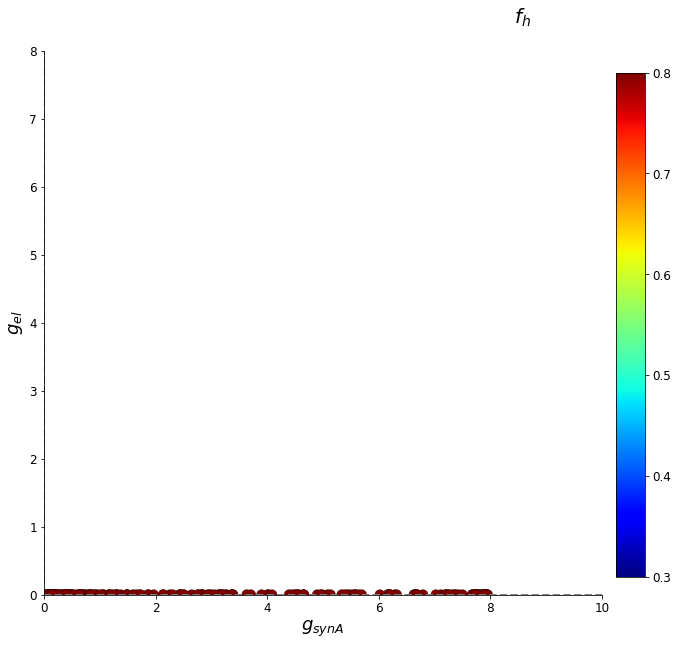

ValueError: too many values to unpack (expected 2)

In [22]:

ME_its = 2*[100]
Zs, axs = dsn_pairplots(model_dirs, 'Zs', system, system.D, f_str='identity', \
                   c_str='hubfreq', legendstrs=num_rs*[''], AL_final_its=ME_its, \
                   fontsize=18, ellipses=False, tri=True, \
                   outlier_stds=2,
                   xlims=[0, 10], ylims=[0, 8])

In [17]:
print(AL_final_its)
AL_final_its = [10, 10]
#pfnames = ['images/Z_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
Zs = dsn_pairplots(fnames, 'Zs', system, system.D, f_str='identity', \
                   c_str='log_q_z', legendstrs=legendstrs, AL_final_its=AL_final_its, \
                   fontsize=14, ellipses=False, tri=True, \
                   outlier_stds=10,
                   xlims=[0, 20], ylims=[0, 20])


NameError: name 'AL_final_its' is not defined

here!
not saving
k = 10 has not converged so not plotting.
here!
not saving
k = 10 has not converged so not plotting.


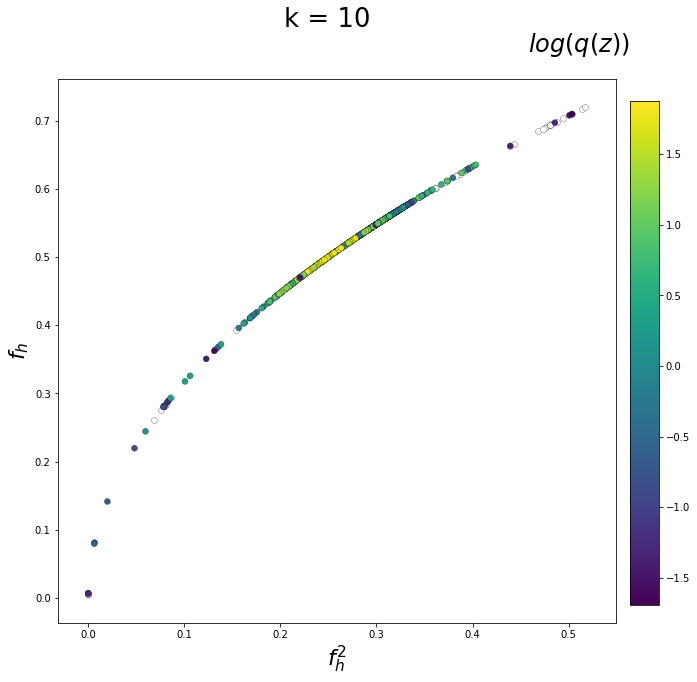

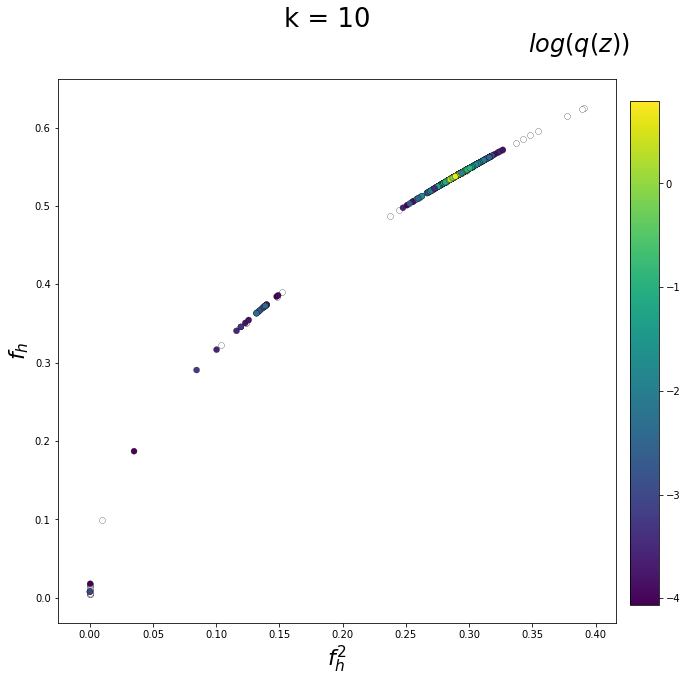

In [36]:
#pfnames = ['images/T_x_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
T_xs = dsn_pairplots(fnames, 'T_xs', system, 2, f_str='identity', \
                      c_str='log_q_z', legendstrs=legendstrs, AL_final_its=AL_final_its, \
                      fontsize=22, ellipses=False, tri=True) #, pfnames=pfnames)        

